# [RDKit](https://www.rdkit.org/) and Cheminformatics
Lecturers = R. Patrick Xian, Santosh Adhikari, Sourin Dey<br>
Date = 08/2022

## 1. Quantitative structure–activity relationship  (QSAR)
### 1.1 A brief history of QSAR

#### <font color='green'>Goal:</font> Build predictive models linking structure and (bio)activity for (mostly organic) molecules

#### <font color='green'>History:</font> [Corwin Hansch](https://en.wikipedia.org/wiki/Corwin_Hansch) (1918-2011), father of QSAR, spent most of his career at Pomona College, CA, USA

#### <font color='green'>Usage:</font>
- #### drug discovery -- given a target protein to bind, search for druglike molecules (aka. leads)
- #### synthesis prediction -- given reagents, predict synthesis outcome (product structure, ranking, etc)

#### <font color='green'>Transferrable concepts:</font> molecular representation, molecular similarity

## 2. [RDKit](https://github.com/rdkit) -- cheminformatics and predictive modelling toolkit
Data used here subsampled come from the GuacaMol dataset by [BenevolentAI](https://www.benevolent.com/),<br>
Brown et al., [GuacaMol: Benchmarking Models for de Novo Molecular Design](https://pubs.acs.org/doi/10.1021/acs.jcim.8b00839), JCIM (2019)

### 2.1 Chemical representation
#### ```SMILES``` (Simplified molecular-input line-entry system)
[David Weininger](https://en.wikipedia.org/wiki/David_Weininger), [SMILES, a chemical language and information system. 1. Introduction to methodology and encoding rules](https://doi.org/10.1021/ci00057a005) (1988)

#### Convert IUPAC name to SMILES string

In [6]:
import cirpy

In [7]:
chem_name = 'n-Octane'
cirpy.resolve(chem_name, 'smiles')

'CCCCCCCC'

#### Convert SMILES string to IUPAC

In [8]:
import pubchempy

In [9]:
compound = pubchempy.get_compounds('CCCCCCCC', namespace='smiles')
compound

[Compound(356)]

In [10]:
compound[0].iupac_name

'octane'

In [11]:
compound = pubchempy.get_compounds('COc1ccc(NC(=O)c2cccc(Cn3cc(Br)cn3)c2)cn1', namespace='smiles')
compound

[Compound(1235939)]

In [12]:
compound[0].iupac_name

'3-[(4-bromopyrazol-1-yl)methyl]-N-(6-methoxypyridin-3-yl)benzamide'

### 2.2 Drawing molecules
#### Kekulization
<img src="Kekulization.png" alt="isolated" width="800"/>

Set drawing options, see all options [here](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.MolDrawing.html).

In [16]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw.MolDrawing import DrawingOptions

# Set drawing options
DrawingOptions.bondLineWidth = 2
DrawingOptions.atomLabelFontSize = 15
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.useFraction = 1.

Drawing without Kekulization

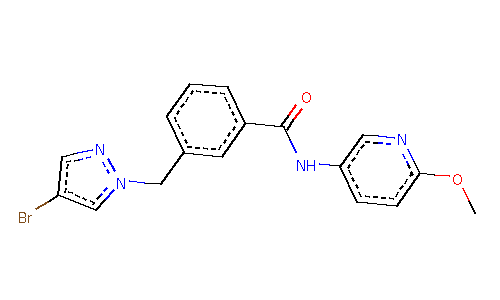

In [17]:
mol_smile = 'COc1ccc(NC(=O)c2cccc(Cn3cc(Br)cn3)c2)cn1'
mol = Chem.MolFromSmiles(mol_smile)
Draw.MolToImage(mol, fitImage=True, kekulize=False, size=(500, 300))

Drawing with Kekulization

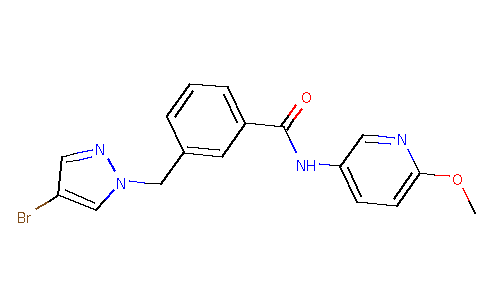

In [18]:
Draw.MolToImage(mol, fitImage=True, kekulize=True, size=(500, 300))

Drawing with Kekulization and numbering

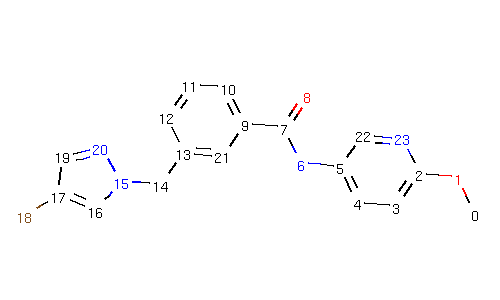

In [19]:
DrawingOptions.includeAtomNumbers = True
Draw.MolToImage(mol, fitImage=True, kekulize=True, size=(500, 300))

### 2.3 Chemical descriptors

In [20]:
from rdkit.Chem import Descriptors as D

In [21]:
print(dir(D))

['BalabanJ', 'BertzCT', 'Chem', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHet

### 2.3 A concrete example -- Wiener index
Boiling point predictor for linear (C$_n$H$_{2n+2}$) and branched alkanes/paraffins<br>
[Harry Wiener](https://en.wikipedia.org/wiki/Harry_Wiener), [Structural Determination of Paraffin Boiling Points](https://pubs.acs.org/doi/abs/10.1021/ja01193a005), J. Am. Chem. Soc. 69, 17 (1947)

In [22]:
import matplotlib.pyplot as plt

In [23]:
prefixes = ['But', 'Pent', 'Hex', 'Hept', 'Oct', 'Non', 'Dec', 'Undec', 'Dodec']
names = ['n-' + pref + 'ane' for pref in prefixes]
names

['n-Butane',
 'n-Pentane',
 'n-Hexane',
 'n-Heptane',
 'n-Octane',
 'n-Nonane',
 'n-Decane',
 'n-Undecane',
 'n-Dodecane']

In [24]:
boiling_points = [-0.5, 36.1, 68.7, 98.4, 125.7, 150.8, 174.0, 195.8, 216.2]

In [25]:
# Calculate the Wiener index
def wiener_index(m):
    res = 0
    mol = Chem.MolFromSmiles(m)
    amat = Chem.GetDistanceMatrix(mol)
    num_atoms = mol.GetNumAtoms()
    for i in range(num_atoms):
        for j in range(i+1,num_atoms):
            res += amat[i][j]
    return res

Convert IUPAC names to SMILES using [Chemical Identifier Resolver (CIR)](https://cactus.nci.nih.gov/chemical/structure)

In [26]:
smiles = [cirpy.resolve(name, 'smiles') for name in names]

In [27]:
smiles

['CCCC',
 'CCCCC',
 'CCCCCC',
 'CCCCCCC',
 'CCCCCCCC',
 'CCCCCCCCC',
 'CCCCCCCCCC',
 'CCCCCCCCCCC',
 'CCCCCCCCCCCC']

In [28]:
wiener_index('CCCC')

10.0

In [29]:
wi = [wiener_index(smile) for smile in smiles]
wi

[10.0, 20.0, 35.0, 56.0, 84.0, 120.0, 165.0, 220.0, 286.0]

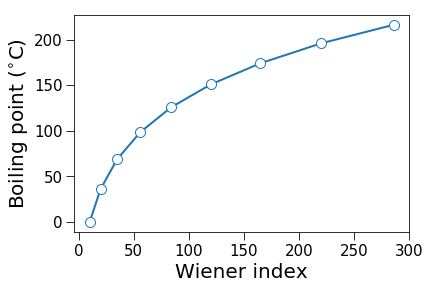

In [30]:
plt.plot(wi, boiling_points, '-o', mfc='w', markersize=10, linewidth=2)
plt.tick_params(which='both', length=8, labelsize=15)
plt.xlabel('Wiener index', fontsize=20)
plt.ylabel('Boiling point ($^{\circ}$C)', fontsize=20);